In [2]:
import pandas as pd

df = pd.read_csv("exams.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
# Select score culumns for analysis
score_columns = ["math score", "reading score", "writing score"]
scores_df = df[score_columns]

scores_df.head()

,math score,reading score,writing score
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68


In [4]:
# calculate basic statistics
mean_scores = scores_df.mean()
median_scores = scores_df.median()
std_scores = scores_df.std()

print("Mean scores: ")
print(mean_scores)

print ("\nMedian scores: ")
print(median_scores)

print("\nStd scores: ")
print(std_scores)

Mean scores: 
math score       66.396
reading score    69.002
writing score    67.738
dtype: float64

Median scores: 
math score       66.5
reading score    70.0
writing score    68.0
dtype: float64

Std scores: 
math score       15.402871
reading score    14.737272
writing score    15.600985
dtype: float64


In [5]:
# Calculate min and max value for each score
min_scores = scores_df.min()
max_scores = scores_df.max()

print("Minimum scores: ")
print(min_scores)

print("Maximum scores: ")
print(max_scores)


Minimum scores: 
math score       13
reading score    27
writing score    23
dtype: int64
Maximum scores: 
math score       100
reading score    100
writing score    100
dtype: int64


An average score is calculated for each student by combining math, reading, and writing scores.
This provides a single metric that simplifies comparisons across different student groups.

In [6]:
df[ "average_score"] = df [["math score", "reading score", "writing score"]].mean(axis=1)

df[["math score", "reading score", "writing score", "average_score"]].head()


,math score,reading score,writing score,average_score
0,67,67,63,65.666667
1,40,59,55,51.333333
2,59,60,50,56.333333
3,77,78,68,74.333333
4,78,73,68,73.000000


Basic group-based comparisons are performed to explore differences in student performance
based on demographic and preparation-related factors.

In our dataset, female students performed slightly better generally.


In [7]:
# comparing average scores by gender
gender_stats = df.groupby("gender")["average_score"].agg([
    "mean",
    "median",
    "std",
    "count"
])

gender_stats


,mean,median,std,count
gender,,,,
female,68.930987,68.666667,14.722462,483
male,66.573179,67.000000,14.237090,517


Students who completed the test preparation course achieved higher average scores.

In [8]:
prep_stats = df.groupby("test preparation course")["average_score"].agg([
    "mean",
    "median",
    "std",
    "count"
])

prep_stats

,mean,median,std,count
test preparation course,,,,
completed,72.815920,73.666667,13.661491,335
none,65.140852,65.333333,14.258433,665


### Distribution of average scores

A histogram is used to visualize the distribution of students' overall performance. 
This helps identify common score ranges and detect potential skewness in the data.

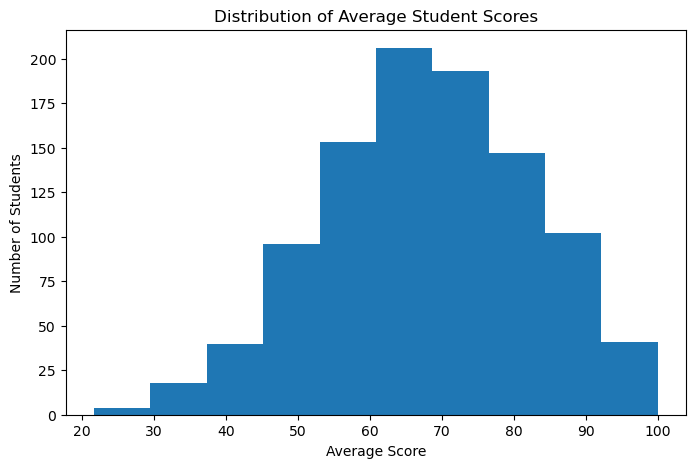

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["average_score"], bins=10)
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Average Student Scores")
plt.show()

### Average Score by Gender

A boxplot is used to compare the distribution of average scores between genders.
This visualization highlights differences in median, spread, and potential outliers.

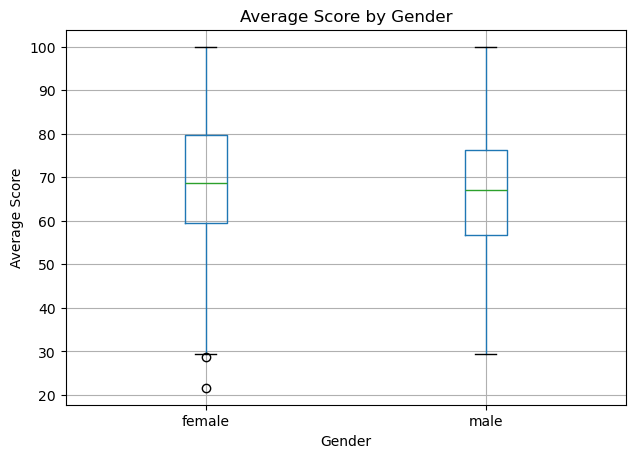

In [10]:
import matplotlib.pyplot as plt
df.boxplot(column="average_score", by="gender", figsize=(7, 5))
plt.title("Average Score by Gender")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()


The boxplot compares the distribution of average scores between male and female students.

It shows the median score for each group as well as the spread of the data.

Potential outliers highlight students with unusually high or low performance.

### Impact of Test Preparation Course

This section compares the average scores of students who completed the test preparation course versus those who did not.
It helps reveal whether such courses are associated with better performance.

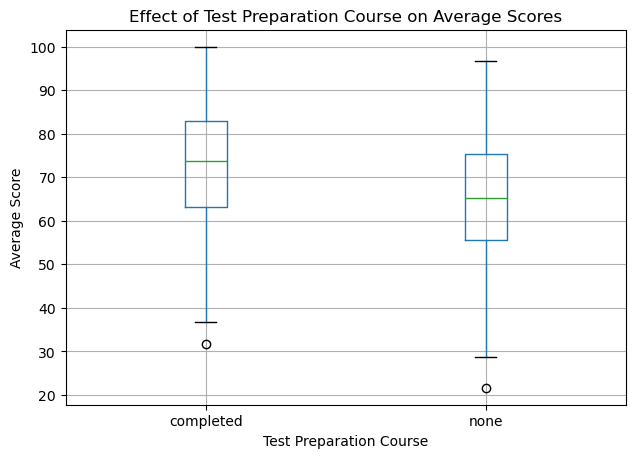

In [11]:
import matplotlib.pyplot as plt

df.boxplot(column="average_score", by="test preparation course", figsize=(7, 5))
plt.title("Effect of Test Preparation Course on Average Scores")
plt.suptitle("")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.show()

In [12]:
df.groupby("test preparation course")["average_score"].mean()

test preparation course
completed    72.815920
none         65.140852
Name: average_score, dtype: float64

Students who completed the test preparation course have a higher average score
compared to those who did not, supporting the visual pattern seen in the boxplot.


### Correlation Between Exam Scores
This section explores the relationship between math, reading, and writing scores to understand how performance in one subject relates to others.

In [13]:
df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


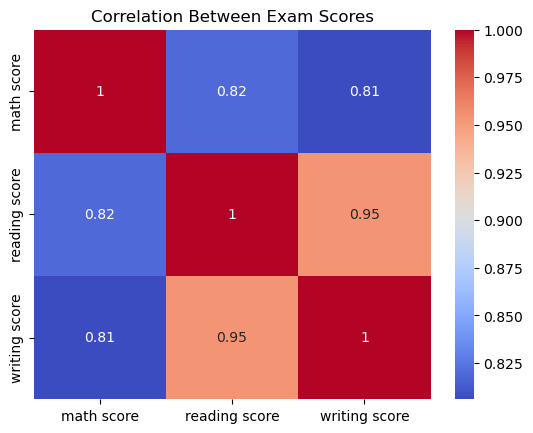

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    df[["math score", "reading score", "writing score"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Exam Scores")
plt.show()

The correlation matrix shows a strong positive relationship between reading and writing scores,
while math also demonstrates a moderate to strong correlation with the other subjects.


#### Analysis by Parental Education

In [15]:
df.groupby("parental level of education")["average_score"].mean().sort_values()

parental level of education
some high school      62.549738
high school           65.818482
some college          66.692192
associate's degree    70.211823
bachelor's degree     73.303571
master's degree       74.300000
Name: average_score, dtype: float64

<Figure size 1000x600 with 0 Axes>

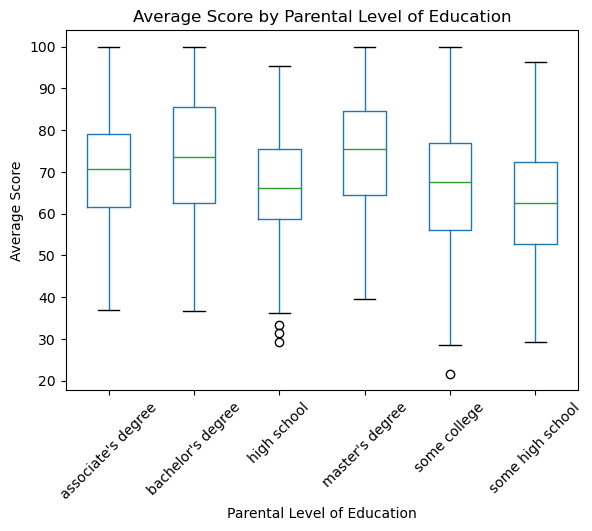

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.boxplot(
    column="average_score",
    by="parental level of education",
    grid=False
)

plt.title("Average Score by Parental Level of Education")
plt.suptitle("")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


This boxplot compares students' average exam scores based on their parents' level of education.
Overall, students whose parents have higher levels of education tend to achieve higher median scores.
The spread of scores also varies across groups, indicating that parental education level may be
associated with both performance and score variability.


#### Simple Linear Regression: Predicting Writing Score from Math Score


In [ ]:
from sklearn.linear_model import LinearRegression

X = df[["math score"]]
y = df["writing score"]

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

slope, intercept

r_squared = model.score(X, y)
r_squared

0.6495464388346049

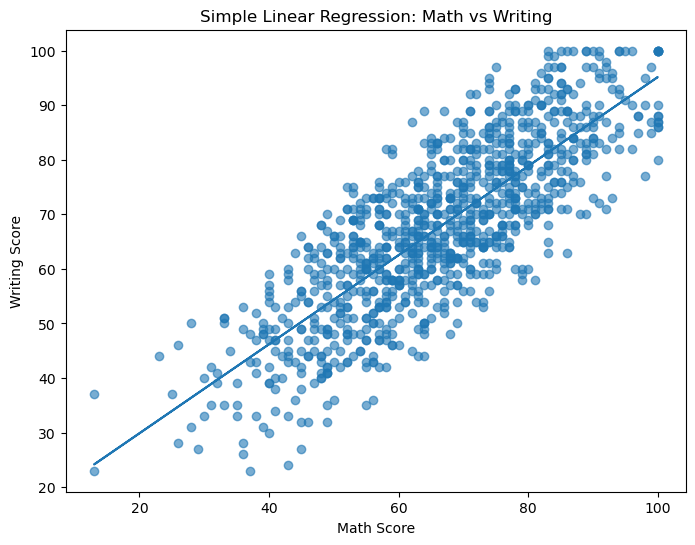

In [19]:
import matplotlib.pyplot as plt

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df["math score"], df["writing score"], alpha=0.6)
plt.plot(df["math score"], y_pred)

plt.title("Simple Linear Regression: Math vs Writing")
plt.xlabel("Math Score")
plt.ylabel("Writing Score")
plt.show()


A simple linear regression model was applied to predict writing scores based on math scores.
The model shows a positive linear relationship, indicating that students with higher math scores
tend to achieve higher writing scores as well.
The R² value suggests that a significant portion of the variance in writing scores can be explained
by math performance alone.
